In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol = 'AXISBANK.NS'

# Download stock data
stk_data = yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024,741.915161,6660243
2021-06-02,744.799988,745.299988,734.200012,737.000000,733.800537,9973043
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.391296,8170508
2021-06-04,751.000000,759.900024,740.099976,742.049988,738.828552,10336011
2021-06-07,743.099976,753.950012,741.500000,751.099976,747.839294,6986728
...,...,...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000,667.589233,3969894
2021-12-30,668.000000,673.099976,664.500000,668.849976,665.946350,5119705
2021-12-31,672.950012,686.500000,671.200012,678.549988,675.604248,5586980


In [2]:
# Create a date range with daily frequency
all_date = pd.date_range(start, end, freq='D')
all_date

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31', '2022-01-01', '2022-01-02', '2022-01-03',
               '2022-01-04', '2022-01-05'],
              dtype='datetime64[ns]', length=219, freq='D')

In [3]:
dummyDate = stk_data.reindex(all_date).fillna(method='ffill')
dummyDate

C:\Users\saran\AppData\Local\Temp\ipykernel_10580\3543650480.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dummyDate = stk_data.reindex(all_date).fillna(method='ffill')


,Open,High,Low,Close,Adj Close,Volume
2021-06-01,753.549988,754.000000,741.150024,745.150024,741.915161,6660243.0
2021-06-02,744.799988,745.299988,734.200012,737.000000,733.800537,9973043.0
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.391296,8170508.0
2021-06-04,751.000000,759.900024,740.099976,742.049988,738.828552,10336011.0
2021-06-05,751.000000,759.900024,740.099976,742.049988,738.828552,10336011.0
...,...,...,...,...,...,...
2022-01-01,672.950012,686.500000,671.200012,678.549988,675.604248,5586980.0
2022-01-02,672.950012,686.500000,671.200012,678.549988,675.604248,5586980.0
2022-01-03,680.250000,698.500000,679.000000,696.349976,693.326965,8550860.0
2022-01-04,701.000000,711.049988,700.049988,709.150024,706.071472,9705906.0


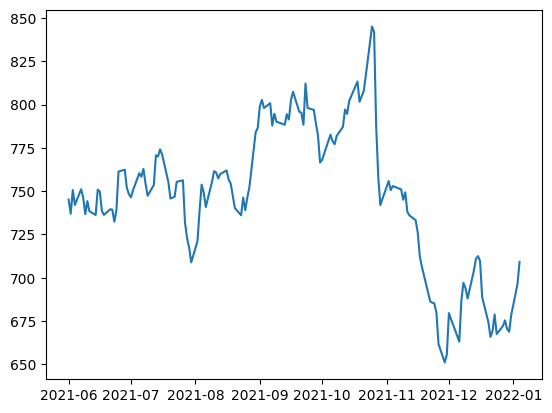

In [4]:
import matplotlib.pyplot as plt
plt.plot(stk_data["Close"])

<Figure size 1600x500 with 0 Axes>

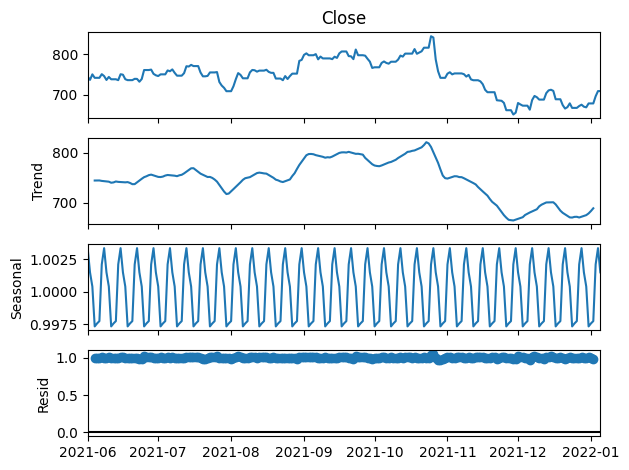

In [5]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

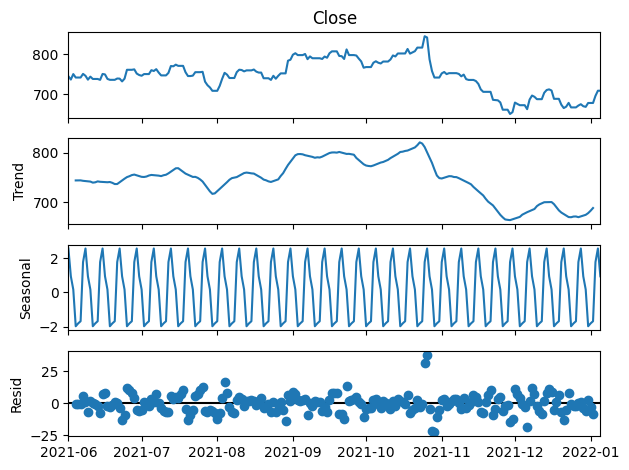

In [6]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [7]:

# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message
    
# Call the function and run the test



Results of Dickey-Fuller Test:
Test Statistic                  -1.370200
p-value                          0.596476
#Lags Used                       3.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


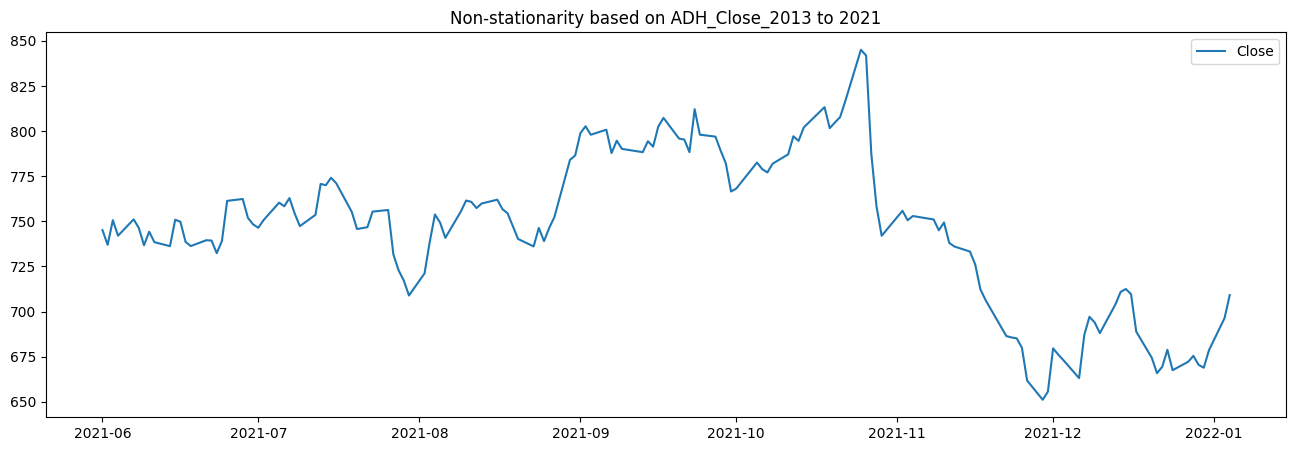

'Non-stationarity based on ADH'

In [8]:
adf_test(stk_data["Close"],stk_data,"Close")

In [9]:
from statsmodels.tsa.stattools import adfuller

# Define the time series
timeseries = dummyDate['Close']

# Perform the Dickey-Fuller test
print('Results of Dickey-Fuller Test:')
dftest = adfuller(timeseries, autolag='AIC')


Results of Dickey-Fuller Test:


In [10]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)
ans = dfoutput


Test Statistic                  -1.828680
p-value                          0.366319
#Lags Used                       1.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


In [11]:
print("Condition:")
print("p-value<=0.05-->Accept Alternate Hypothesis")
print("p-value>0.05-->Accept Null Hypothesis")


Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis


In [12]:
if (ans['Test Statistic'] < ans["Critical Value (1%)"] or ans['Test Statistic'] < ans["Critical Value (5%)"] or ans['Test Statistic'] < ans["Critical Value (10%)"]) and ans["p-value"] < 0.05:
    print("Condition: statistic < any critical value and p-value <0.05 to reject null hypothesis")
    print("Reject null hypothesis: Non-Stationarity")
    print("Accept Alternate hypothesis: Stationarity")
    message = "Stationarity based on ADF"
else:
    print("Condition: statistic < any critical value and p-value <0.05 to reject null hypothesis")
    print("Accept null hypothesis: Non-Stationarity")
    print("Reject Alternate hypothesis: Stationarity")
    message = "Non-stationarity based on ADF"


Condition: statistic < any critical value and p-value <0.05 to reject null hypothesis
Accept null hypothesis: Non-Stationarity
Reject Alternate hypothesis: Stationarity


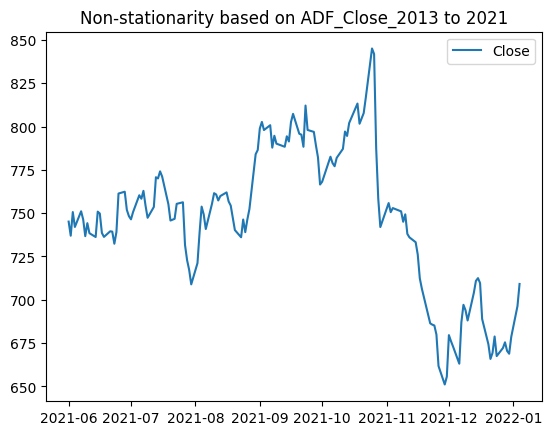

In [15]:
plt.plot(stk_data.index, stk_data[Close], label=Close)
plt.legend(loc='best')
plt.title("{}_{}_2013 to 2021".format(message, Close))
plt.savefig("{}_ADF.png".format(Close))
plt.show()


In [14]:
Close = 'Close'


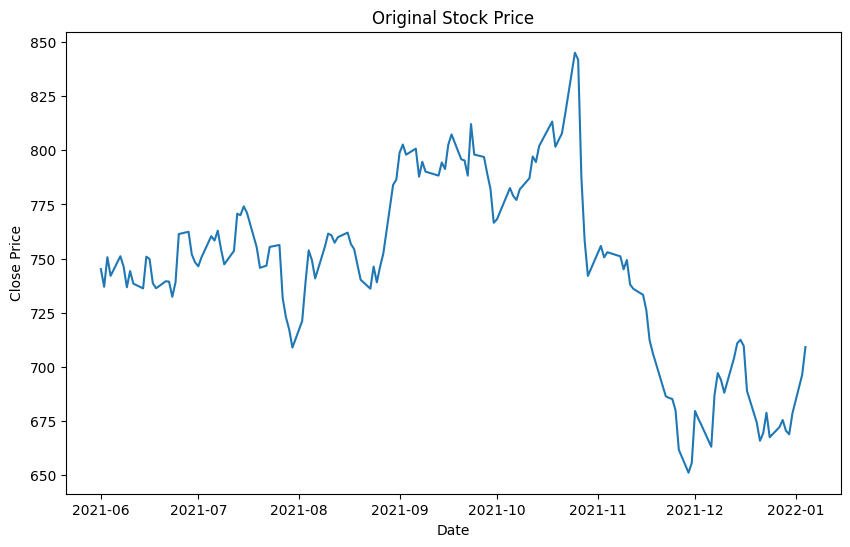

ADF Test on Original Data
ADF Statistic: -1.3702000789032385
p-value: 0.5964762909376662
Critical Values:
   1%, -3.4759527332353084
   5%, -2.881548071241103
   10%, -2.577438765246763


In [21]:
def adf_test(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(stk_data['Close'])
plt.title('Original Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Perform the ADF test on the original data
print("ADF Test on Original Data")
adf_test(stk_data['Close'])

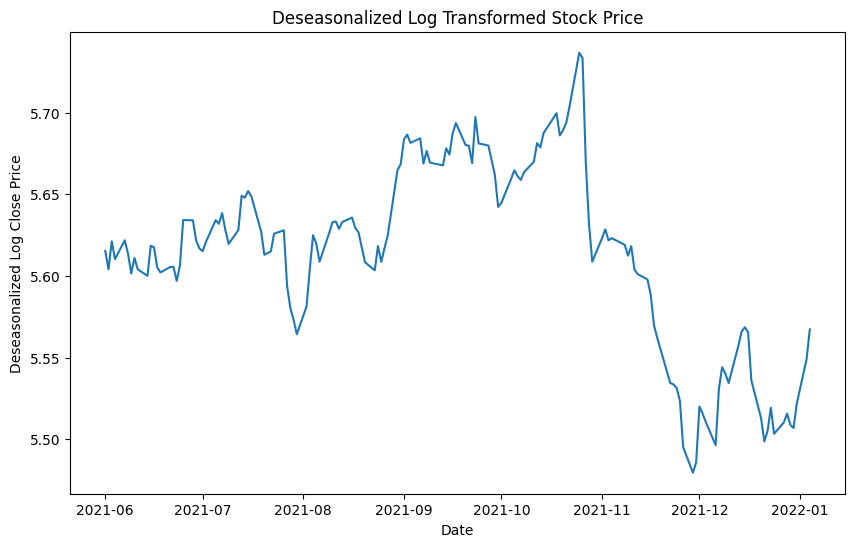


ADF Test on Deseasonalized Log Transformed Data
ADF Statistic: -1.3493684099078096
p-value: 0.6062947370013957
Critical Values:
   1%, -3.4759527332353084
   5%, -2.881548071241103
   10%, -2.577438765246763


In [22]:
stk_data['Log_Close'] = np.log(stk_data['Close'])

# Seasonal Decomposition
decomposition = seasonal_decompose(stk_data['Log_Close'], model='multiplicative', period=30)
stk_data['Log_Close_Seasonal'] = decomposition.seasonal
stk_data['Log_Close_Deseasonal'] = stk_data['Log_Close'] - stk_data['Log_Close_Seasonal']

# Plot the deseasonalized log transformed data
plt.figure(figsize=(10, 6))
plt.plot(stk_data['Log_Close_Deseasonal'])
plt.title('Deseasonalized Log Transformed Stock Price')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Log Close Price')
plt.show()

# Perform the ADF test on the deseasonalized log transformed data
print("\nADF Test on Deseasonalized Log Transformed Data")
adf_test(stk_data['Log_Close_Deseasonal'])

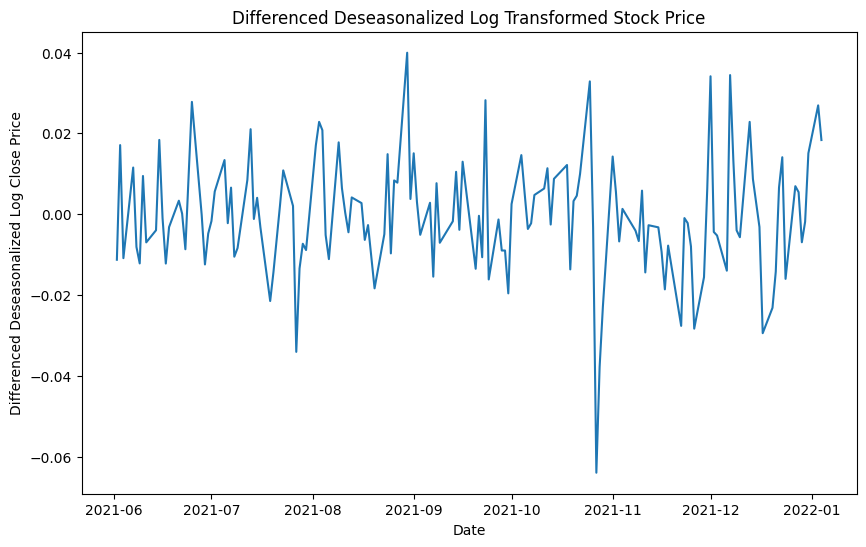


ADF Test on Differenced Deseasonalized Log Transformed Data
ADF Statistic: -7.8007451284271925
p-value: 7.505024538568477e-12
Critical Values:
   1%, -3.4759527332353084
   5%, -2.881548071241103
   10%, -2.577438765246763


In [23]:
stk_data['Log_Close_Deseasonal_Diff'] = stk_data['Log_Close_Deseasonal'].diff()

# Plot the differenced deseasonalized log transformed data
plt.figure(figsize=(10, 6))
plt.plot(stk_data['Log_Close_Deseasonal_Diff'])
plt.title('Differenced Deseasonalized Log Transformed Stock Price')
plt.xlabel('Date')
plt.ylabel('Differenced Deseasonalized Log Close Price')
plt.show()

# Perform the ADF test on the differenced deseasonalized log transformed data
print("\nADF Test on Differenced Deseasonalized Log Transformed Data")
adf_test(stk_data['Log_Close_Deseasonal_Diff'].dropna())

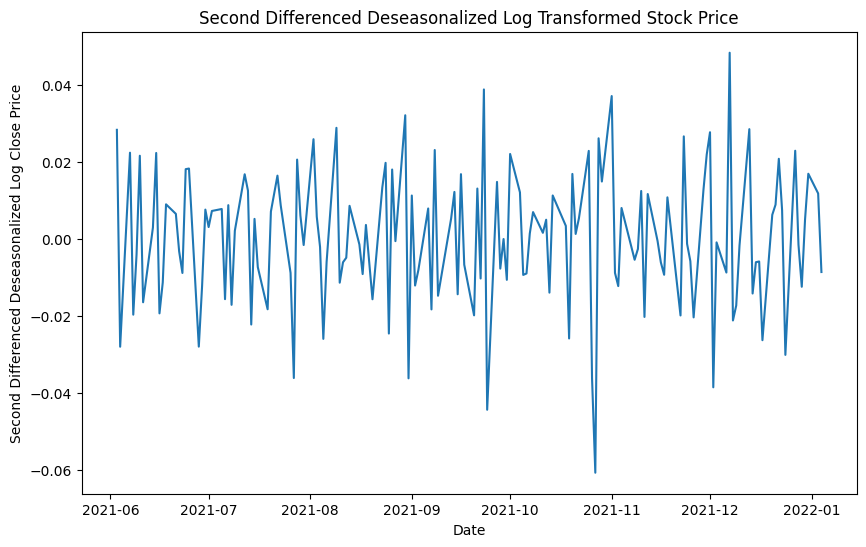


ADF Test on Second Differenced Deseasonalized Log Transformed Data
ADF Statistic: -6.343504749082573
p-value: 2.7182012283344752e-08
Critical Values:
   1%, -3.479742586699182
   5%, -2.88319822181578
   10%, -2.578319684499314


In [24]:
stk_data['Log_Close_Deseasonal_Diff2'] = stk_data['Log_Close_Deseasonal_Diff'].diff()

# Plot the second differenced deseasonalized log transformed data
plt.figure(figsize=(10, 6))
plt.plot(stk_data['Log_Close_Deseasonal_Diff2'])
plt.title('Second Differenced Deseasonalized Log Transformed Stock Price')
plt.xlabel('Date')
plt.ylabel('Second Differenced Deseasonalized Log Close Price')
plt.show()

# Perform the ADF test on the second differenced deseasonalized log transformed data
print("\nADF Test on Second Differenced Deseasonalized Log Transformed Data")
adf_test(stk_data['Log_Close_Deseasonal_Diff2'].dropna())